Filters 101

This notebook aims to explore the impact of filters and data transformations on seismic data. The notebook can be adjusted to explore different filters and different types of earthquake signals (local, regional, teleseismic). The notebook as written captures a local M4.3 earthquake in Southwestern Puert Rico on  2021-06-24 20:10:57.36 UTC as recorded at the broadband station AGPR located in Aguadilla, Puerto Rico (NW corner of PR). 

As part of the exercise, you will repeat the notebook for the recent M8.2 Alaska earthquake that occured at 2021-07-29 06:15:47 UTC. Note you will need to account for the traveltime to the seismic station for this teleseismic event as well as increase the time window to capture the full waveform. Apply the knowledge on catalogs from yesterday to help you decide on the best time window to use. Take note of the different behavoir and frequency content of the signal. You are also encouraged to change the parameters of the filter to explore the impact upon the waveforms.  


The notebook will introduce 3 basic filter types: highpass, lowpass, and bandpass. The results of each filter will be plotted as both a waveform and a spectrogram to permit exploration of the impact of each filter. 


The first step as with all python codes is to load libraries and modules that will be used in the notebook.

In [4]:
import obspy
import matplotlib.pyplot as plt
import numpy as np
from obspy.clients.fdsn import Client
from obspy import UTCDateTime
from obspy import read, read_inventory
from matplotlib import cm
import matplotlib as mpl


Now we will retrieve data from a single station for a single earthquake. Note that this notebook assumes that you will be using the IRIS server but this can be run to connect to any SEEDLink server by changing the Client definition.

Client: SEEDLink server. Here the default is the IRIS repository.

tstart: the UTC time to start getting data YYYY-MM-DD HH:MM:SS.SS

tend: the UTC time to end getting data YYYY-MM-DD HH:MM:SS.SS

Now get the data from the server and station info from the IRIS server. Note that stations, networks, etc can use wildcards such as * and ?:

st= client.get_waveforms('networklist','stationlist','locationcode','channel',tstart,tend,attach_response=True)

You also need to retrieve the station metadata that is associated with the waveforms: 

inv=client.get_stations(network='network_list',station='*',channel='HHZ',starttime=tstart,endtime=tend, level='response', matchtimeseries=True)

Key Parameters:

'networklist': The network list can be any real or virtual network available on the server. You will receive an error if a network does not exist. You can request mutiple networks by using a comma separated list with NO spaces e.g. PR,GS,IU

'stationlist': This is the list of station(s) to be included. It may be a comma separeted value list or a wildcard such as * denoting retrieve all.

'locationcode': specify the location code of the stations to be downloaded.

'channel': Specify the channel you want to use for the record section



In [5]:
client = Client("IRIS")
tstart = UTCDateTime("2021-06-24 20:10:57.36")
tend = UTCDateTime("2021-06-24 20:12:57.36")

st = client.get_waveforms('PR','AGPR','*','?H?',tstart,tend,attach_response=True)
inv = client.get_stations(network='PR',station='AGPR',channel='?H?',starttime=tstart,endtime=tend, level='response', matchtimeseries=True)

 Now let's plot the Raw data. Is it possible to pick the P and S wave in the Raw Data? If so use your cursor to determine the P and S arrival. Record this and also note the polarity of the P wave and if it is an emergent or impulsive arrival. Once you have done this close the pop-up window to continue

Using matplotlib backend: MacOSX


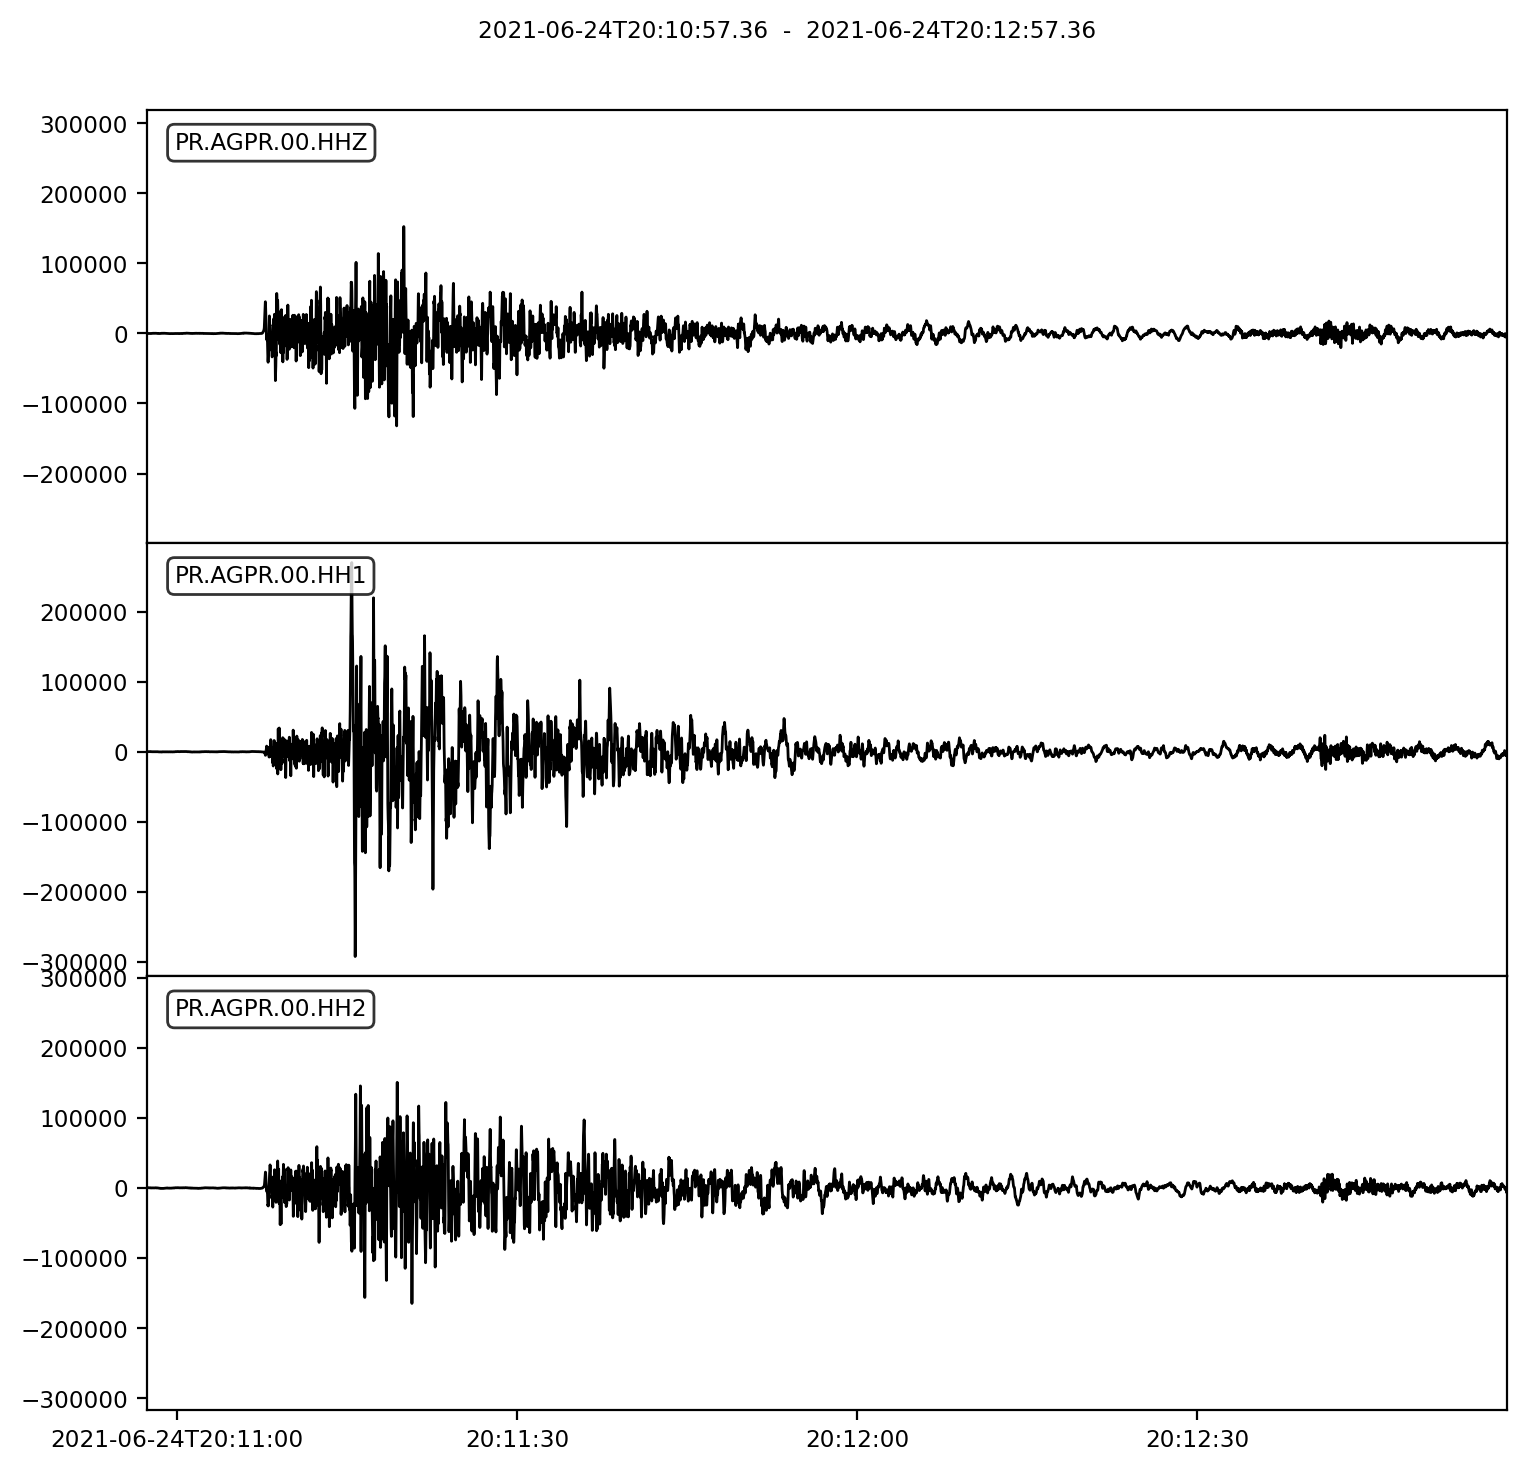

In [6]:
dt= st[0].stats.starttime
%matplotlib
st.plot()
#dt=st[0].stats.starttime
#st.plot(equal_scale=False, starttime=dt+40, endtime=dt+45)

Now let's examine the frequency content of the Raw data by plotting the spectogram. In order to better visualize the frequency content, this code snippet also creates a custom colorbar for the spectrogram.

Note that for looking at teleseismic events or other events you may need to change the parameters for plotting. Specifically the y limit (ax2.set_ylim) may need to be changed to highlight the frequencies contained in a specific waveform.

The code snippet repeats 3 times so each component can be plotted. Do you think you could make P and S picks off of the spectrogram? What use do you think spectrograms may play in day to day operations?


PR.AGPR.00.HH1 | 2021-06-24T20:10:57.360000Z - 2021-06-24T20:12:57.360000Z | 100.0 Hz, 12001 samples


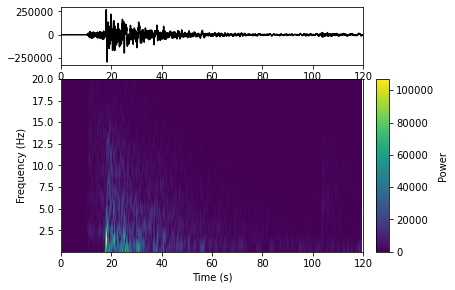

In [7]:
##Plot the HH1 component
# Step one set up axes for the multipart figure
%matplotlib inline
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.75, 0.7, 0.2]) #[left bottom width height]
ax2 = fig.add_axes([0.1, 0.1, 0.7, 0.60], sharex=ax1)
ax3 = fig.add_axes([0.83, 0.1, 0.03, 0.6])

#plot the waveform in ax1
t = np.arange(st[0].stats.npts) / st[0].stats.sampling_rate
print(st[0])
ax1.plot(t, st[0].data, 'k')

#plot the spectrogram in ax2
st[0].spectrogram(show=False, axes=ax2)
#set the y limits to select frequenies plotted
ax2.set_ylim((0.02,20)) 
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Frequency (Hz)')
#Get information for the spectrogram to create and plot a colorbar in ax3
mappable = ax2.images[0]
cb=plt.colorbar(mappable=mappable, cax=ax3)
cb.set_label('Power')


PR.AGPR.00.HH2 | 2021-06-24T20:10:57.360000Z - 2021-06-24T20:12:57.360000Z | 100.0 Hz, 12001 samples


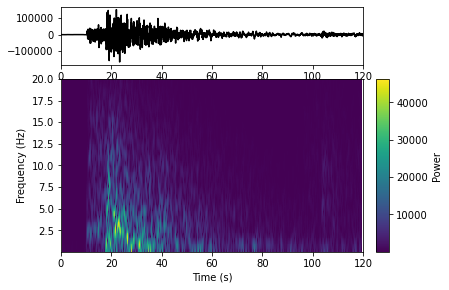

In [8]:

#Repeat the process for the HH2 component
%matplotlib inline
fig2 = plt.figure()
ax1 = fig2.add_axes([0.1, 0.75, 0.7, 0.2]) #[left bottom width height]
ax2 = fig2.add_axes([0.1, 0.1, 0.7, 0.60], sharex=ax1)
ax3 = fig2.add_axes([0.83, 0.1, 0.03, 0.6])

print(st[1])
ax1.plot(t, st[1].data, 'k')
st[1].spectrogram(show=False, axes=ax2)
ax2.set_ylim((0.02,20)) 
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Frequency (Hz)')
mappable = ax2.images[0]
cb=plt.colorbar(mappable=mappable, cax=ax3)
cb.set_label('Power')

plt.show()




PR.AGPR.00.HHZ | 2021-06-24T20:10:57.360000Z - 2021-06-24T20:12:57.360000Z | 100.0 Hz, 12001 samples


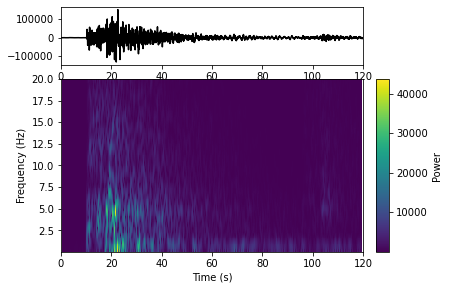

In [9]:

## Repeat once more for the HHZ component
%matplotlib inline
fig3 = plt.figure()
ax1 = fig3.add_axes([0.1, 0.75, 0.7, 0.2]) #[left bottom width height]
ax2 = fig3.add_axes([0.1, 0.1, 0.7, 0.60], sharex=ax1)
ax3 = fig3.add_axes([0.83, 0.1, 0.03, 0.6])
print(st[2])
ax1.plot(t, st[2].data, 'k')
st[2].spectrogram(show=False, axes=ax2, title=st[2])
ax2.set_ylim((0.02,20)) 
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Frequency (Hz)')
mappable = ax2.images[0]
cb=plt.colorbar(mappable=mappable, cax=ax3)
cb.set_label('Power')


Now that we have seen the Raw data; let's start exploring what happens we apply different filters. Feel free to change numbers and explore. Every earthquake and station has its own personality so sometimes a "standard" filter needs to be adjusted.

First step: 1. copy the Raw data to a new variable! This perserves the raw data in the original stream variable (st)

Second we will start with a high pass filter. This filter will permit frequencies higher than a given limit to remain inthe waveform while eliminating lower frquencies. It is good practice when filtering to deman and dtrend the data as well to remove instrument drift due to things such as daily temperature fluctuations.

It is suggested to run this notebook for a few different corner frequencies. What do you observe? At each frequency try re-picking the P and S wave. How do the picks change?

When repeating this notebook for the teleseimic event consider the results from plotting the spectrogram and adjust the corner frequency accordingly. Note that as with the previous section the ax2.set_ylim parameters may also need to be adjusted for better visualization of your results.


For more information on filtering streams in Obspy and more options see: https://docs.obspy.org/packages/autogen/obspy.core.stream.Stream.filter.html



Using matplotlib backend: MacOSX


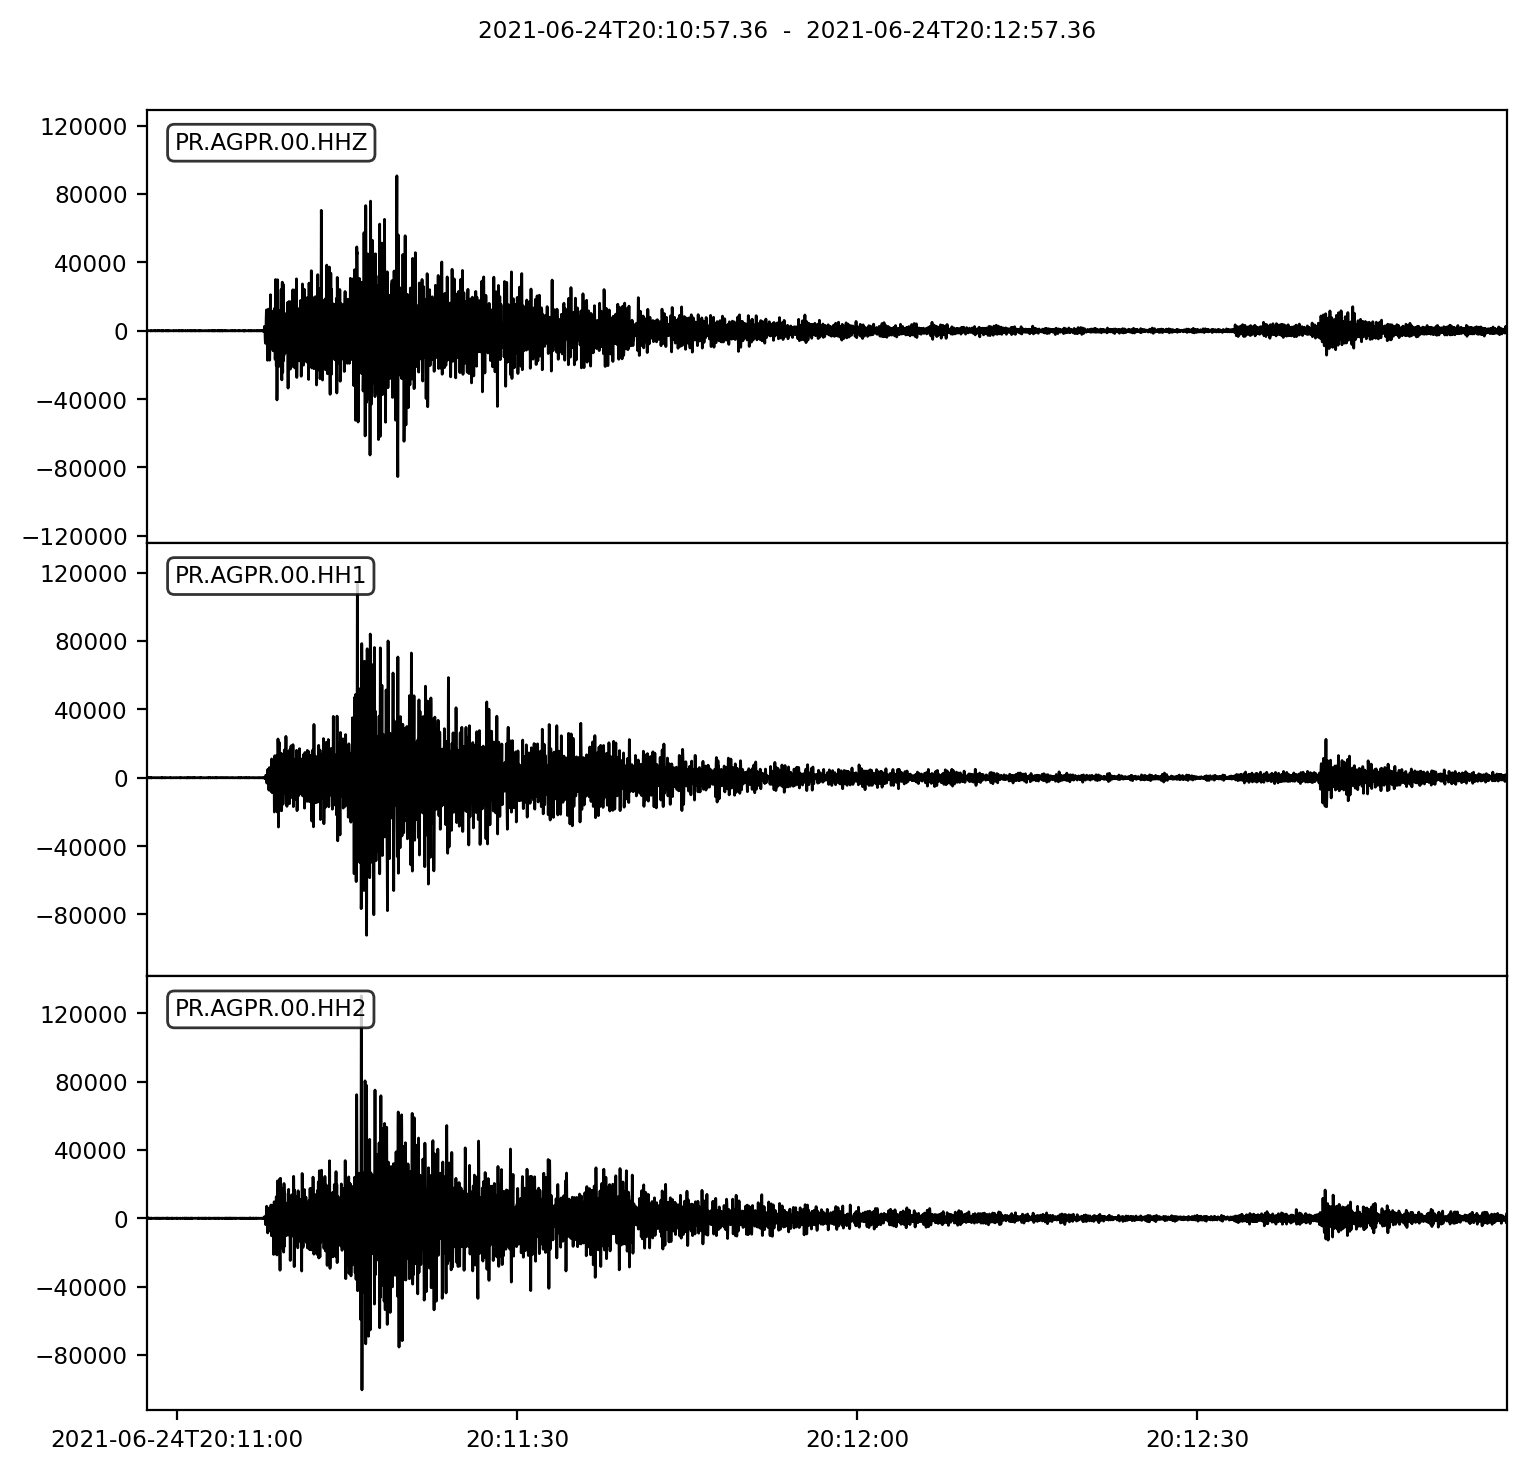

In [10]:
#copy the data
tr = st.copy()
#demean and detrend
tr.detrend(type='demean')
tr.detrend(type='linear')
#highpass filter the data
tr.filter("highpass", freq=5.0, corners=4, zerophase=False)

#plot the data
%matplotlib
tr.plot()
#dt=tr[0].stats.starttime
#tr.plot(equal_scale=False, starttime=dt+40, endtime=dt+45)

PR.AGPR.00.HH1 | 2021-06-24T20:10:57.360000Z - 2021-06-24T20:12:57.360000Z | 100.0 Hz, 12001 samples


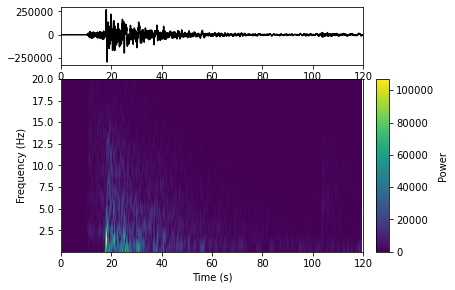

In [11]:

#plot the spectograms
##Plot the HH1 component
# Step one set up axes for the multipart figure
%matplotlib inline
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.75, 0.7, 0.2]) #[left bottom width height]
ax2 = fig.add_axes([0.1, 0.1, 0.7, 0.60], sharex=ax1)
ax3 = fig.add_axes([0.83, 0.1, 0.03, 0.6])

#plot the waveform in ax1
t = np.arange(st[0].stats.npts) / st[0].stats.sampling_rate
print(st[0])
ax1.plot(t, st[0].data, 'k')

#plot the spectrogram in ax2
st[0].spectrogram(show=False, axes=ax2)
#set the y limits to select frequenies plotted
ax2.set_ylim((0.02,20)) 
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Frequency (Hz)')
#Get information for the spectrogram to create and plot a colorbar in ax3
mappable = ax2.images[0]
cb=plt.colorbar(mappable=mappable, cax=ax3)
cb.set_label('Power')




PR.AGPR.00.HH2 | 2021-06-24T20:10:57.360000Z - 2021-06-24T20:12:57.360000Z | 100.0 Hz, 12001 samples


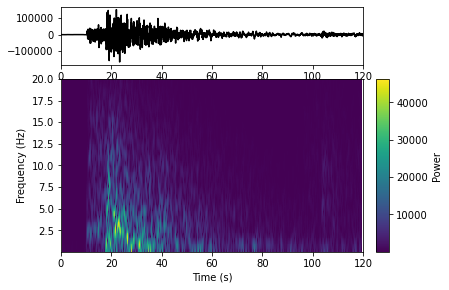

In [12]:
#Repeat the process for the HH2 component
%matplotlib inline
fig2 = plt.figure()
ax1 = fig2.add_axes([0.1, 0.75, 0.7, 0.2]) #[left bottom width height]
ax2 = fig2.add_axes([0.1, 0.1, 0.7, 0.60], sharex=ax1)
ax3 = fig2.add_axes([0.83, 0.1, 0.03, 0.6])

print(st[1])
ax1.plot(t, st[1].data, 'k')
st[1].spectrogram(show=False, axes=ax2)
ax2.set_ylim((0.02,20)) 
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Frequency (Hz)')
mappable = ax2.images[0]
cb=plt.colorbar(mappable=mappable, cax=ax3)
cb.set_label('Power')



PR.AGPR.00.HHZ | 2021-06-24T20:10:57.360000Z - 2021-06-24T20:12:57.360000Z | 100.0 Hz, 12001 samples


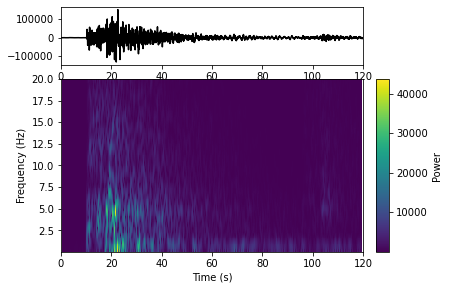

In [13]:


## Repeat once more for the HHZ component
%matplotlib inline
fig3 = plt.figure()
ax1 = fig3.add_axes([0.1, 0.75, 0.7, 0.2]) #[left bottom width height]
ax2 = fig3.add_axes([0.1, 0.1, 0.7, 0.60], sharex=ax1)
ax3 = fig3.add_axes([0.83, 0.1, 0.03, 0.6])
print(st[2])
ax1.plot(t, st[2].data, 'k')
st[2].spectrogram(show=False, axes=ax2, title=st[2])
ax2.set_ylim((0.02,20)) 
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Frequency (Hz)')
mappable = ax2.images[0]
cb=plt.colorbar(mappable=mappable, cax=ax3)
cb.set_label('Power')


Now let's repeat the same exercise, but this time apply a lowpass filter. This filter will keep frequencies below the given corner frequency while eliminating higher frequencies.

What do you observe? Try re-picking the P and S wave. How do the picks change?


When repeating this notebook for the teleseimic event consider the results from plotting the spectrogram and adjust the corner frequency accordingly. Note that as with the previous section the ax2.set_ylim parameters may also need to be adjusted for better visualization of your results.


Using matplotlib backend: MacOSX


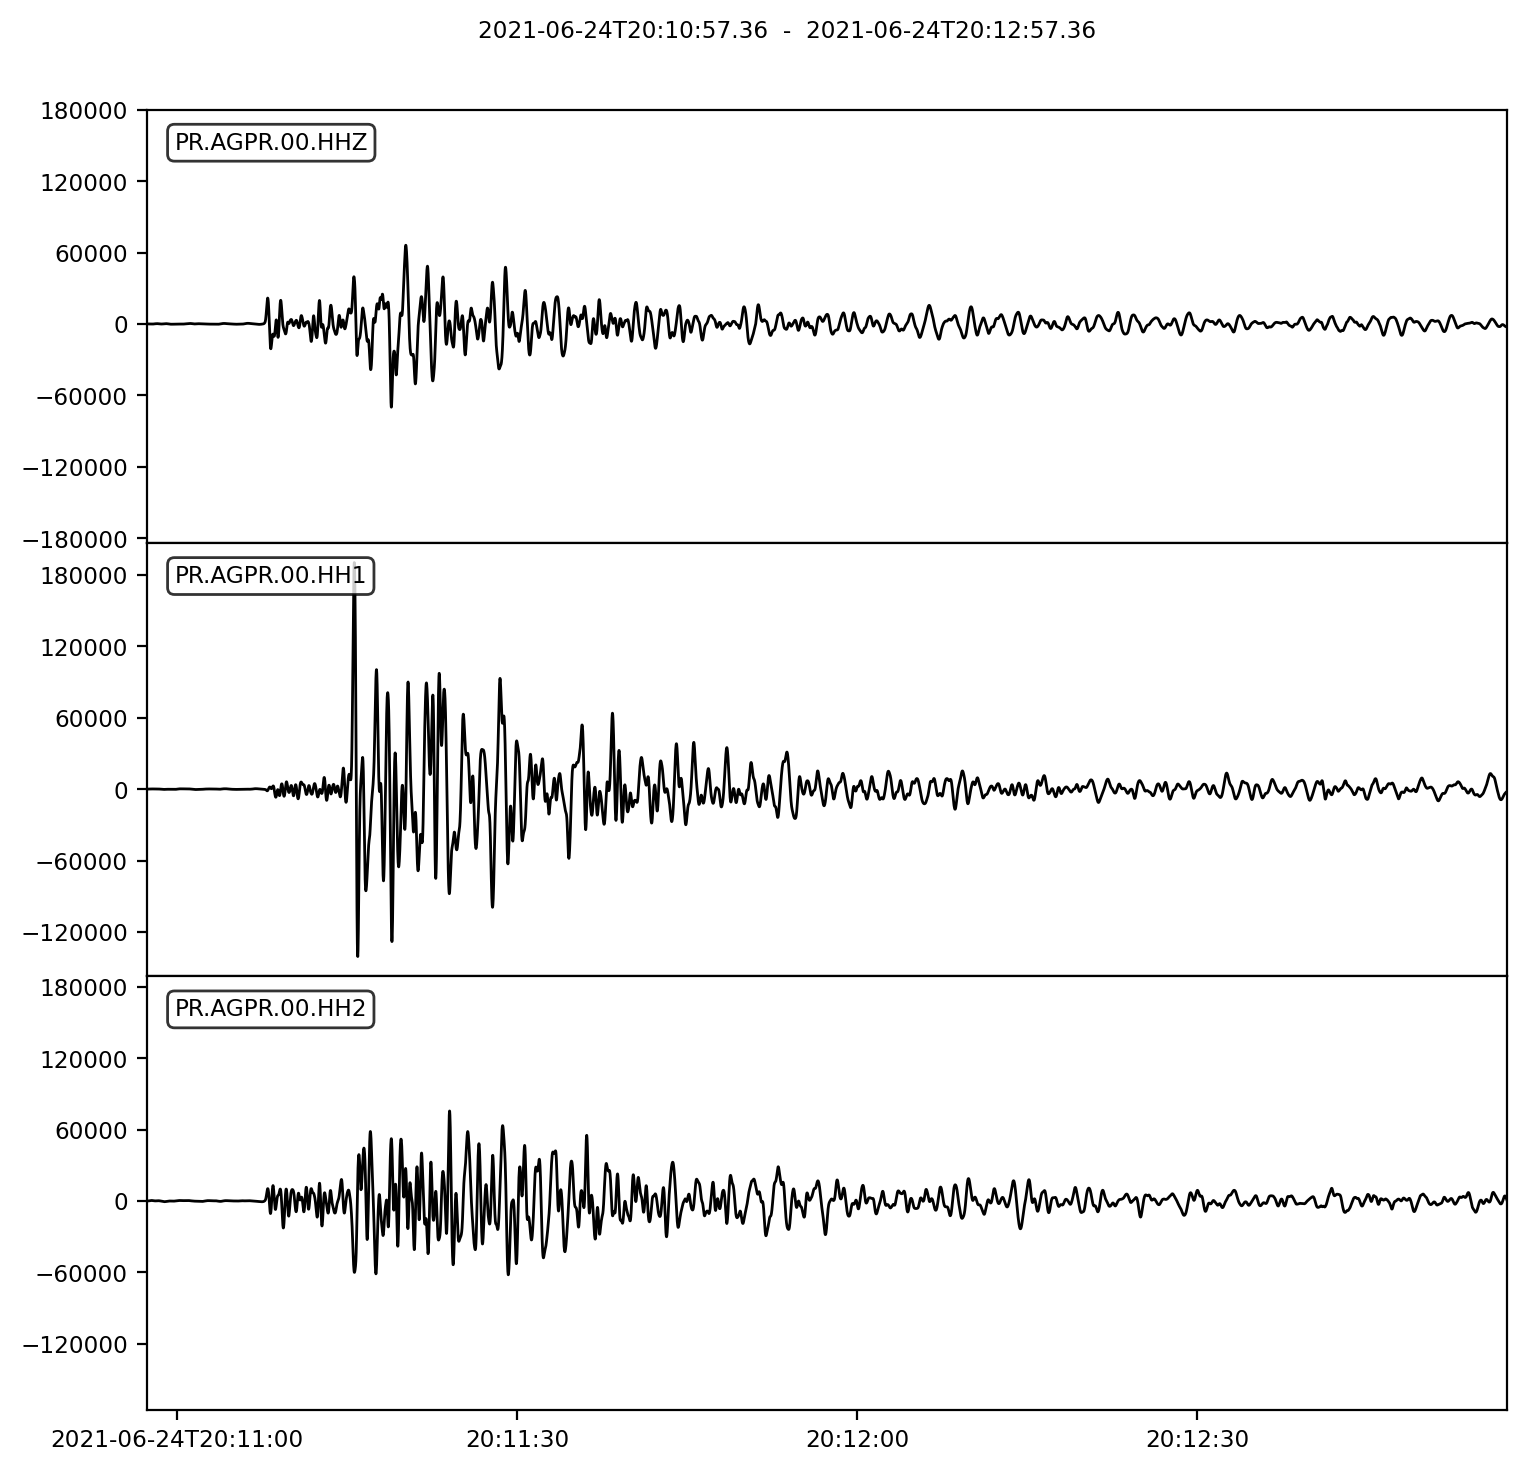

In [14]:
#copy the data
tr = st.copy()
#demean and detrend
tr.detrend(type='demean')
tr.detrend(type='linear')
#highpass filter the data
tr.filter("lowpass", freq=2.0, corners=4, zerophase=False)

#plot the data
%matplotlib
tr.plot()
#dt=tr[0].stats.starttime
#tr.plot(equal_scale=False, starttime=dt+40, endtime=dt+45)


PR.AGPR.00.HH1 | 2021-06-24T20:10:57.360000Z - 2021-06-24T20:12:57.360000Z | 100.0 Hz, 12001 samples


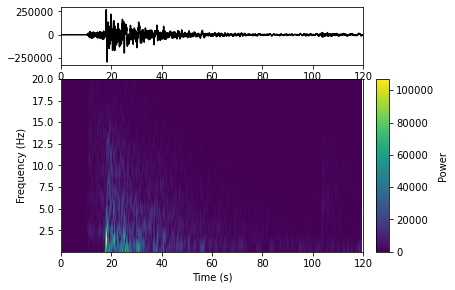

In [15]:
#plot the spectograms
##Plot the HH1 component
# Step one set up axes for the multipart figure
%matplotlib inline
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.75, 0.7, 0.2]) #[left bottom width height]
ax2 = fig.add_axes([0.1, 0.1, 0.7, 0.60], sharex=ax1)
ax3 = fig.add_axes([0.83, 0.1, 0.03, 0.6])

#plot the waveform in ax1
t = np.arange(st[0].stats.npts) / st[0].stats.sampling_rate
print(st[0])
ax1.plot(t, st[0].data, 'k')

#plot the spectrogram in ax2
st[0].spectrogram(show=False, axes=ax2)
#set the y limits to select frequenies plotted
ax2.set_ylim((0.02,20)) 
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Frequency (Hz)')
#Get information for the spectrogram to create and plot a colorbar in ax3
mappable = ax2.images[0]
cb=plt.colorbar(mappable=mappable, cax=ax3)
cb.set_label('Power')




PR.AGPR.00.HH2 | 2021-06-24T20:10:57.360000Z - 2021-06-24T20:12:57.360000Z | 100.0 Hz, 12001 samples


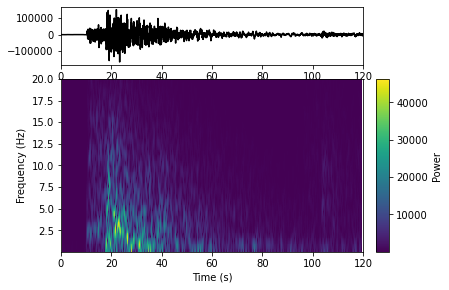

In [16]:
#Repeat the process for the HH2 component
%matplotlib inline
fig2 = plt.figure()
ax1 = fig2.add_axes([0.1, 0.75, 0.7, 0.2]) #[left bottom width height]
ax2 = fig2.add_axes([0.1, 0.1, 0.7, 0.60], sharex=ax1)
ax3 = fig2.add_axes([0.83, 0.1, 0.03, 0.6])

print(st[1])
ax1.plot(t, st[1].data, 'k')
st[1].spectrogram(show=False, axes=ax2)
ax2.set_ylim((0.02,20)) 
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Frequency (Hz)')
mappable = ax2.images[0]
cb=plt.colorbar(mappable=mappable, cax=ax3)
cb.set_label('Power')



PR.AGPR.00.HHZ | 2021-06-24T20:10:57.360000Z - 2021-06-24T20:12:57.360000Z | 100.0 Hz, 12001 samples


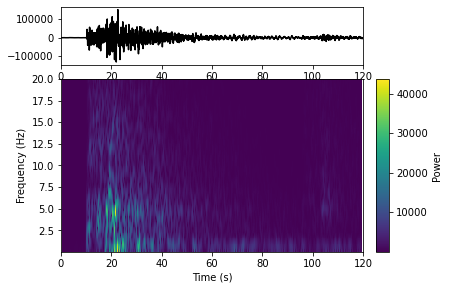

In [17]:


## Repeat once more for the HHZ component
%matplotlib inline
fig3 = plt.figure()
ax1 = fig3.add_axes([0.1, 0.75, 0.7, 0.2]) #[left bottom width height]
ax2 = fig3.add_axes([0.1, 0.1, 0.7, 0.60], sharex=ax1)
ax3 = fig3.add_axes([0.83, 0.1, 0.03, 0.6])
print(st[2])
ax1.plot(t, st[2].data, 'k')
st[2].spectrogram(show=False, axes=ax2, title=st[2])
ax2.set_ylim((0.02,20)) 
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Frequency (Hz)')
mappable = ax2.images[0]
cb=plt.colorbar(mappable=mappable, cax=ax3)
cb.set_label('Power')


Finally what happens when we put the two filters together? This is what is called a bandpass filter. This filter permits data between two frequencies to be retained whilst removing frequencies above or below the permitted frequency band. These frequencies are denoted by freqmin and freqmax. As with the other sections, change these and observe the impact on the corners on the waveforms and spectrograms. Also make picks for the P and S wave arrivals to determine how they change. 




When repeating this notebook for the teleseimic event consider the results from plotting the spectrogram and adjust the corner frequency accordingly. Note that as with the previous section the set_ylim parameters may also need to be adjusted for better visualization of your results.



Using matplotlib backend: MacOSX


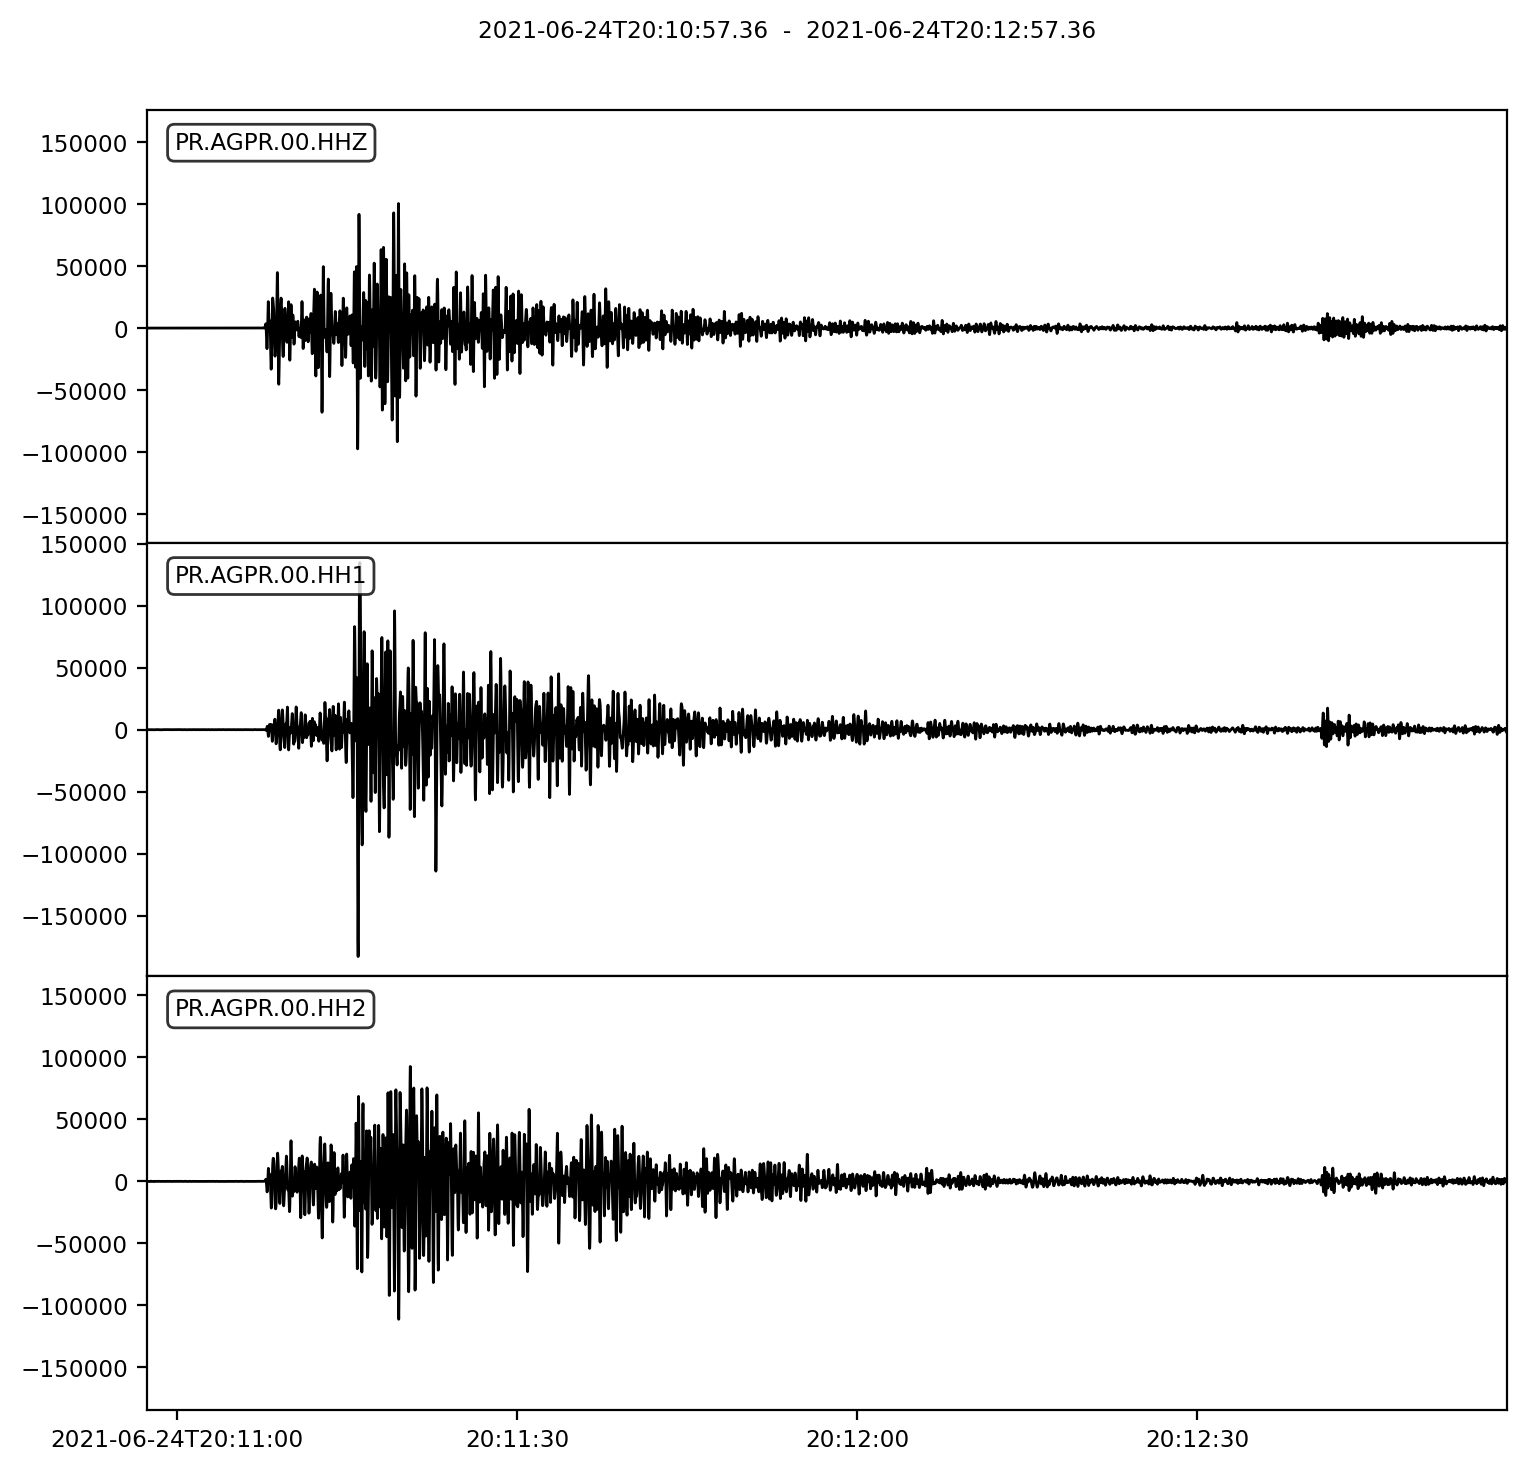

In [18]:
#copy the data
tr = st.copy()
#demean and detrend
tr.detrend(type='demean')
tr.detrend(type='linear')
#highpass filter the data
tr.filter("bandpass", freqmin=2.0, freqmax=6.0, corners=4, zerophase=False)

#plot the data
%matplotlib
tr.plot()
#dt=tr[0].stats.starttime
#tr.plot(equal_scale=False, starttime=dt+40, endtime=dt+45)


PR.AGPR.00.HH1 | 2021-06-24T20:10:57.360000Z - 2021-06-24T20:12:57.360000Z | 100.0 Hz, 12001 samples


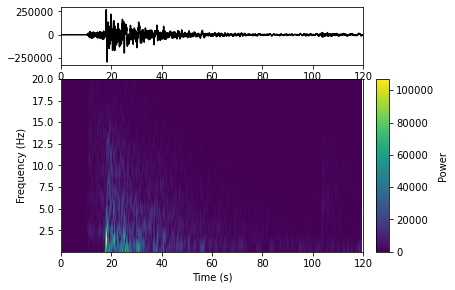

In [19]:
##Plot the HH1 component
# Step one set up axes for the multipart figure
%matplotlib inline
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.75, 0.7, 0.2]) #[left bottom width height]
ax2 = fig.add_axes([0.1, 0.1, 0.7, 0.60], sharex=ax1)
ax3 = fig.add_axes([0.83, 0.1, 0.03, 0.6])

#plot the waveform in ax1
t = np.arange(st[0].stats.npts) / st[0].stats.sampling_rate
print(st[0])
ax1.plot(t, st[0].data, 'k')

#plot the spectrogram in ax2
st[0].spectrogram(show=False, axes=ax2)
#set the y limits to select frequenies plotted
ax2.set_ylim((0.02,20)) 
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Frequency (Hz)')
#Get information for the spectrogram to create and plot a colorbar in ax3
mappable = ax2.images[0]
cb=plt.colorbar(mappable=mappable, cax=ax3)
cb.set_label('Power')




PR.AGPR.00.HH2 | 2021-06-24T20:10:57.360000Z - 2021-06-24T20:12:57.360000Z | 100.0 Hz, 12001 samples


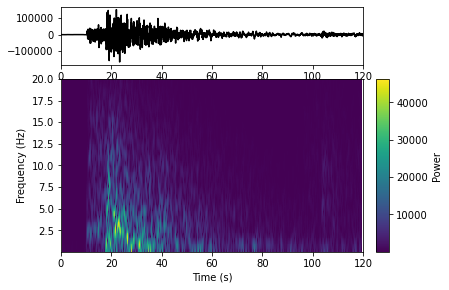

In [20]:
#Repeat the process for the HH2 component
%matplotlib inline
fig2 = plt.figure()
ax1 = fig2.add_axes([0.1, 0.75, 0.7, 0.2]) #[left bottom width height]
ax2 = fig2.add_axes([0.1, 0.1, 0.7, 0.60], sharex=ax1)
ax3 = fig2.add_axes([0.83, 0.1, 0.03, 0.6])

print(st[1])
ax1.plot(t, st[1].data, 'k')
st[1].spectrogram(show=False, axes=ax2)
ax2.set_ylim((0.02,20)) 
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Frequency (Hz)')
mappable = ax2.images[0]
cb=plt.colorbar(mappable=mappable, cax=ax3)
cb.set_label('Power')




PR.AGPR.00.HHZ | 2021-06-24T20:10:57.360000Z - 2021-06-24T20:12:57.360000Z | 100.0 Hz, 12001 samples


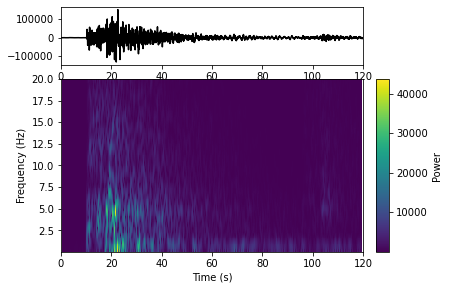

In [21]:

## Repeat once more for the HHZ component
%matplotlib inline
fig3 = plt.figure()
ax1 = fig3.add_axes([0.1, 0.75, 0.7, 0.2]) #[left bottom width height]
ax2 = fig3.add_axes([0.1, 0.1, 0.7, 0.60], sharex=ax1)
ax3 = fig3.add_axes([0.83, 0.1, 0.03, 0.6])
print(st[2])
ax1.plot(t, st[2].data, 'k')
st[2].spectrogram(show=False, axes=ax2, title=st[2])
ax2.set_ylim((0.02,20)) 
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Frequency (Hz)')
mappable = ax2.images[0]
cb=plt.colorbar(mappable=mappable, cax=ax3)
cb.set_label('Power')


Beyond Filtering: Data transformations

This was basic filtering, however for many analyses the Raw data needs to be transformed into a different form such as displacement or acceleration. This can be simply removing the instrument response or transfer the data into displacement, acceleration, or to a different instrument response type.  For instance to calculate a local magnitude one must transfer the raw seismic data into how the data would appear as recorded on a Woods-Anderson seismometer.

For the purpose of this exercise you will practice two types of common data transforms. In the first part below you will transfer the data from raw data to displacement with the instrument response removed. The second part converts the seismograms to a Woods-Anderson response. 

For each section compare the signals and then try varying the water-level and pre-filtering variables. It is worth commenting out the pre-filter and removing it from the response removal command to explore the impact of prefiltering on the signal. As with the filters try to pick the P and S arrival, how do they compare to the Raw data?



Using matplotlib backend: MacOSX


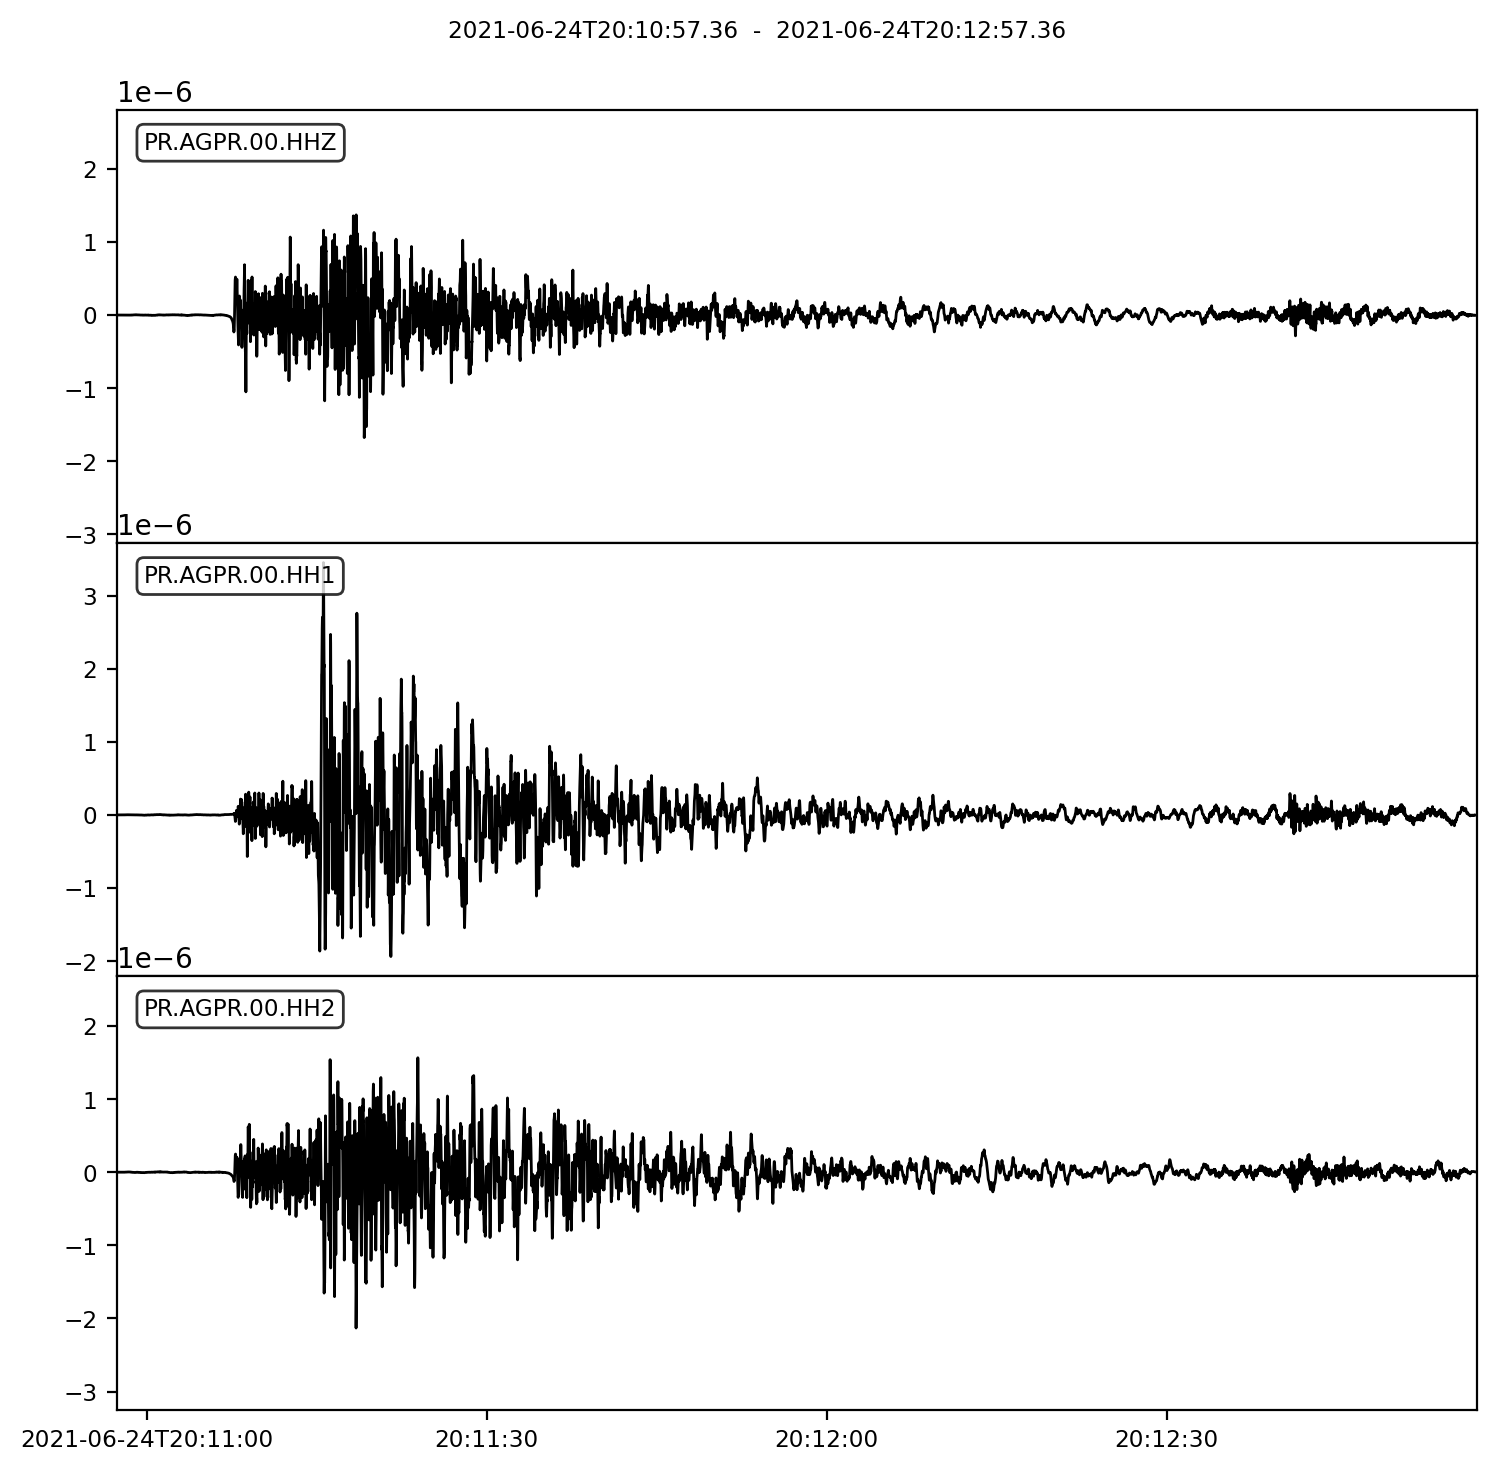

In [22]:
tr = st.copy()

#before changing the data to displacement and removing the intstrument response, etc a prefilter must be defined in order to
#avoid amplifying noise--> to see what happens without this step remove the prefilter
#Also try changing the water level. What happens as the water level is raised
#Note Obspy output for Displacement is in Meters!
pre_filt = (0.001, 0.005, 30.0, 35.0)
tr2 = tr.remove_response(inventory=inv, output='DISP', pre_filt=pre_filt, water_level=5, plot=True)

#Plot the transformed data
%matplotlib
tr2.plot()
#dt=tr2[0].stats.starttime
#tr2.plot(equal_scale=False, starttime=dt+40, endtime=dt+45)

In this section the the signal is converted to a Wood-Anderson signal. In Obspy there are other methods avaailble to retrieve the W-A amplitudes for magnitudes, but for the purposes of this part the manual transfer is being shown such that when Ml is dicussed later in the course you will understand the signal being produced. As with the other data pick the P and S arrival and compare this to the Raw data. Also take note of the y scale, how has this changed? Why do you think that is?

Using matplotlib backend: MacOSX


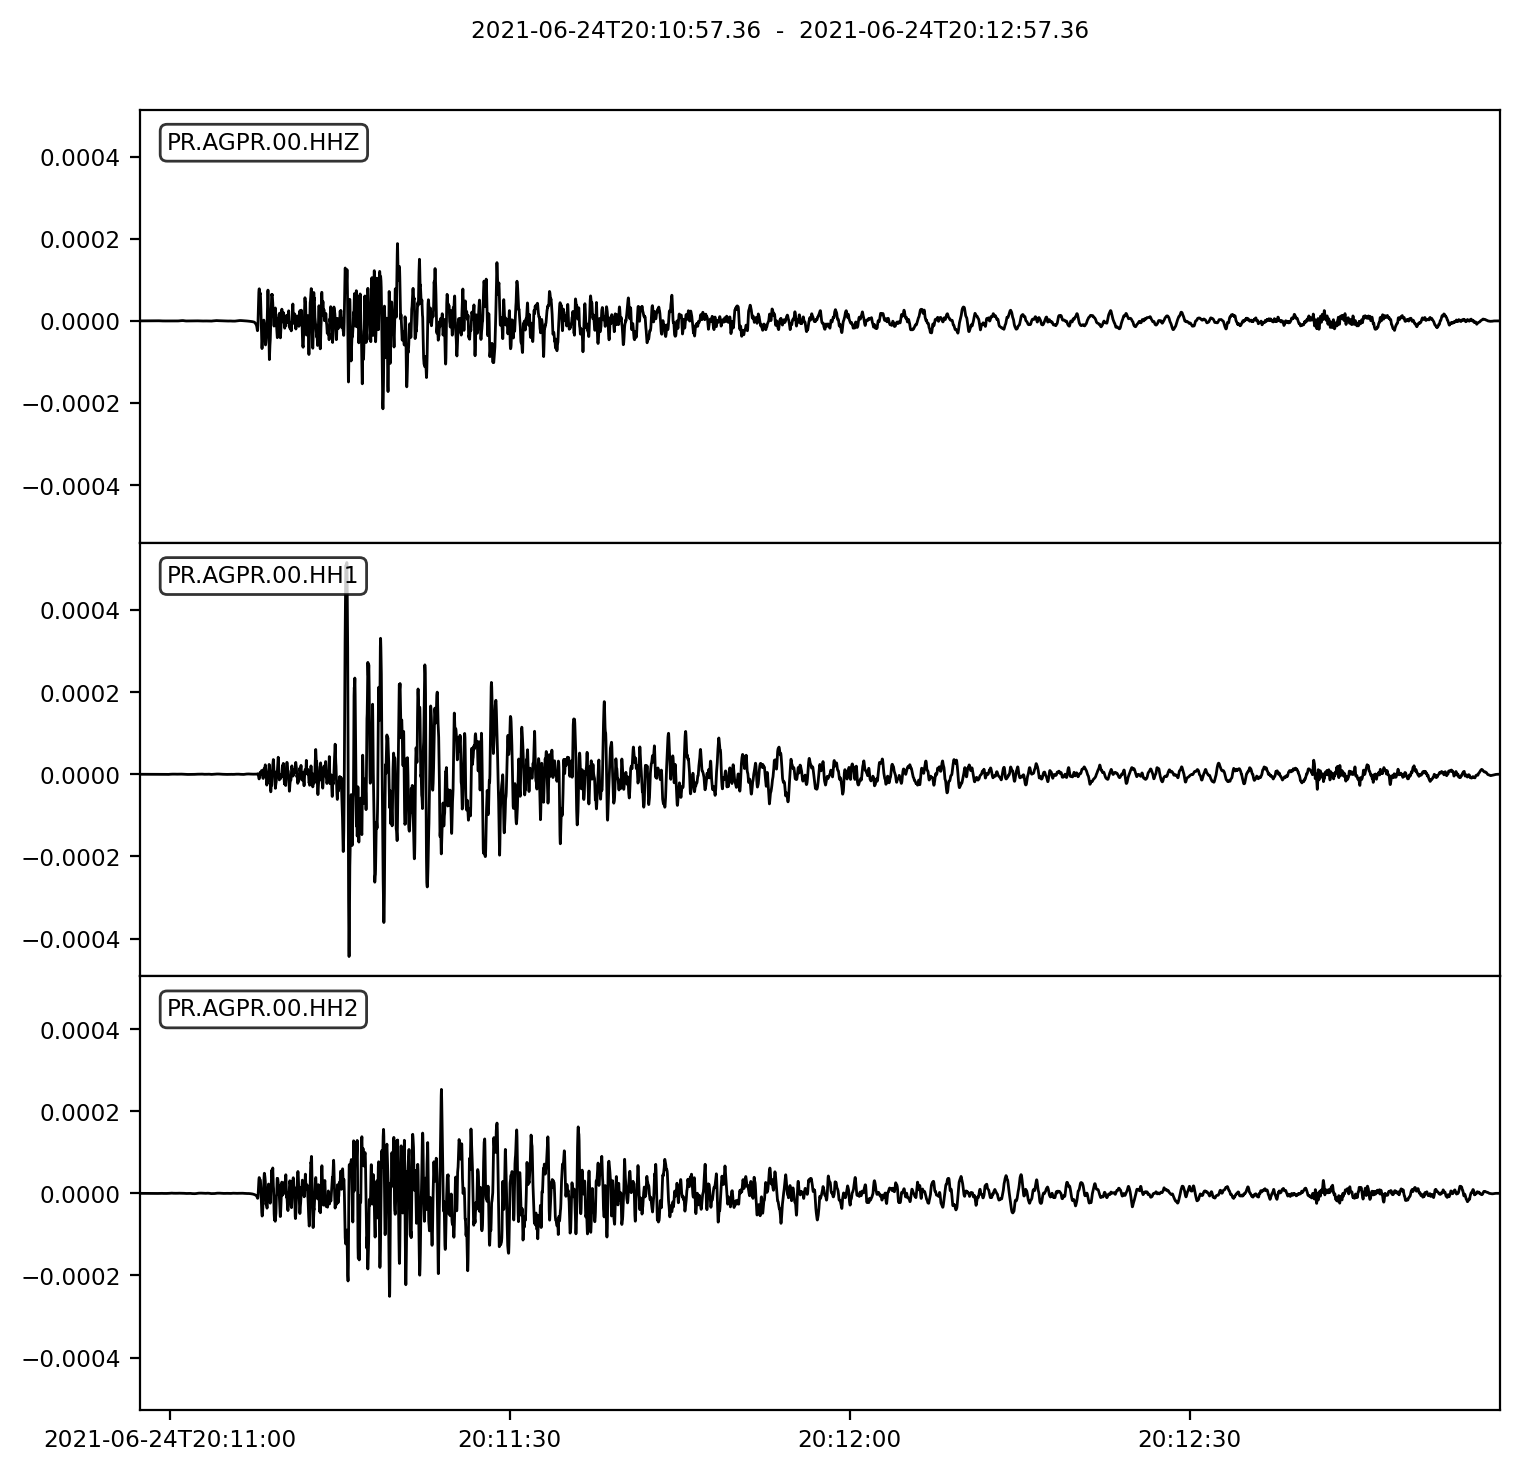

In [23]:
tr = st.copy()


#before changing the data to displacement and removing the intstrument response, etc a prefilter must be defined in order to
#avoid amplifying noise--> to see what happens without this step remove the prefilter
#Also try changing the water level. What happens as the water level is raised
pre_filt = (0.001, 0.005, 30.0, 35.0)
tr2 = tr.remove_response(inventory=inv, output='DISP', pre_filt=pre_filt, water_level=5, plot=False)
#Now define the Wood-Anderson response by its poles and zeros
paz_wa = {'sensitivity': 2800, 'zeros': [0j], 'gain': 1,
          'poles': [-6.2832 - 4.7124j, -6.2832 + 4.7124j]}

#Now convert to the Woods-Anderson response
tr3 = tr.simulate(paz_remove=None, paz_simulate=paz_wa, water_level=5)
%matplotlib
tr3.plot()
#dt=tr3[0].stats.starttime
#tr3.plot(equal_scale=False, starttime=dt+40, endtime=dt+45)
